# Compare Baseline vs Basis Timing Strategies

This notebook compares the performance of different strategies.

In [1]:
import sys
sys.path.insert(0, '/root/sw1')

from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

from src.data.handler import DataHandler
from src.strategy.baseline_roll import BaselineRollStrategy
from src.strategy.basis_timing import BasisTimingStrategy
from src.backtest.engine import BacktestEngine

## 1. Load Data

In [2]:
handler = DataHandler.from_processed_data('/root/sw1/processed_data', 'IC')

2025-12-11 17:28:16.172 | INFO     | src.data.handler:from_processed_data:69 - Loaded index CSI500: 3862 bars
2025-12-11 17:28:16.179 | INFO     | src.data.handler:from_processed_data:73 - Loaded 131 IC contracts
2025-12-11 17:28:16.263 | INFO     | src.data.handler:_load_futures_bars:175 - Loaded 10368 IC daily bars
2025-12-11 17:28:16.267 | INFO     | src.data.handler:from_processed_data:88 - Trading calendar: 2015-04-16 to 2025-11-28, 2583 days


## 2. Run Baseline Strategy

In [3]:
baseline_strategy = BaselineRollStrategy(
    contract_chain=handler.contract_chain,
    roll_days_before_expiry=2,
    contract_selection='nearby',
    target_leverage=1.0,
)

baseline_engine = BacktestEngine(
    data_handler=handler,
    strategy=baseline_strategy,
    strategy_name='Baseline Roll',
    benchmark_name='CSI 500',
)

baseline_result = baseline_engine.run(
    start_date=date(2018, 1, 1),
    end_date=date(2024, 12, 31),
    verbose=False
)

print("Baseline Strategy:")
baseline_result.analyzer.get_metrics_dataframe().head(15)

2025-12-11 17:28:17.286 | INFO     | src.strategy.baseline_roll:on_bar:106 - Rolling IC1801.CFX -> IC1802.CFX on 2018-01-17
2025-12-11 17:28:17.288 | INFO     | src.strategy.baseline_roll:on_bar:106 - Rolling IC1802.CFX -> IC1803.CFX on 2018-02-22
2025-12-11 17:28:17.290 | INFO     | src.strategy.baseline_roll:on_bar:106 - Rolling IC1803.CFX -> IC1804.CFX on 2018-03-14
2025-12-11 17:28:17.292 | INFO     | src.strategy.baseline_roll:on_bar:106 - Rolling IC1804.CFX -> IC1805.CFX on 2018-04-18
2025-12-11 17:28:17.294 | INFO     | src.strategy.baseline_roll:on_bar:106 - Rolling IC1805.CFX -> IC1806.CFX on 2018-05-16
2025-12-11 17:28:17.295 | INFO     | src.strategy.baseline_roll:on_bar:106 - Rolling IC1806.CFX -> IC1807.CFX on 2018-06-13
2025-12-11 17:28:17.297 | INFO     | src.strategy.baseline_roll:on_bar:106 - Rolling IC1807.CFX -> IC1808.CFX on 2018-07-18
2025-12-11 17:28:17.299 | INFO     | src.strategy.baseline_roll:on_bar:106 - Rolling IC1808.CFX -> IC1809.CFX on 2018-08-15
2025-12-

Baseline Strategy:


,Metric,Value
0,Period,2018-01-02 to 2024-12-31
1,Trading Days,1698
2,,
3,Strategy Performance,
4,Total Return,44.65%
5,Annualized Return,5.40%
6,Annualized Volatility,20.97%
7,Sharpe Ratio,0.16
8,Max Drawdown,-35.31%
9,Calmar Ratio,0.15


## 3. Run Basis Timing Strategy

In [4]:
# Need to reload handler as strategy modifies state
handler2 = DataHandler.from_processed_data('/root/sw1/processed_data', 'IC')

timing_strategy = BasisTimingStrategy(
    contract_chain=handler2.contract_chain,
    roll_days_before_expiry=2,
    contract_selection='nearby',
    target_leverage=1.0,
    basis_entry_threshold=-0.02,
    basis_exit_threshold=0.005,
)

timing_engine = BacktestEngine(
    data_handler=handler2,
    strategy=timing_strategy,
    strategy_name='Basis Timing',
    benchmark_name='CSI 500',
)

timing_result = timing_engine.run(
    start_date=date(2018, 1, 1),
    end_date=date(2024, 12, 31),
    verbose=False
)

print("Basis Timing Strategy:")
timing_result.analyzer.get_metrics_dataframe().head(15)

2025-12-11 17:28:20.794 | INFO     | src.data.handler:from_processed_data:69 - Loaded index CSI500: 3862 bars
2025-12-11 17:28:20.799 | INFO     | src.data.handler:from_processed_data:73 - Loaded 131 IC contracts
2025-12-11 17:28:20.885 | INFO     | src.data.handler:_load_futures_bars:175 - Loaded 10368 IC daily bars
2025-12-11 17:28:20.889 | INFO     | src.data.handler:from_processed_data:88 - Trading calendar: 2015-04-16 to 2025-11-28, 2583 days
2025-12-11 17:28:20.902 | INFO     | src.strategy.basis_timing:on_bar:101 - Basis timing: ENTER on 2018-06-19, basis=-0.0216
2025-12-11 17:28:20.903 | INFO     | src.strategy.baseline_roll:on_bar:106 - Rolling IC1807.CFX -> IC1808.CFX on 2018-07-18
2025-12-11 17:28:20.904 | INFO     | src.strategy.baseline_roll:on_bar:106 - Rolling IC1807.CFX -> IC1808.CFX on 2018-07-20
2025-12-11 17:28:20.906 | INFO     | src.strategy.baseline_roll:on_bar:106 - Rolling IC1808.CFX -> IC1809.CFX on 2018-08-15
2025-12-11 17:28:20.907 | INFO     | src.strategy.b

Basis Timing Strategy:


,Metric,Value
0,Period,2018-01-02 to 2024-12-31
1,Trading Days,1698
2,,
3,Strategy Performance,
4,Total Return,-98.96%
5,Annualized Return,-47.87%
6,Annualized Volatility,37.62%
7,Sharpe Ratio,-1.33
8,Max Drawdown,-99.01%
9,Calmar Ratio,-0.48


## 4. Compare NAV Curves

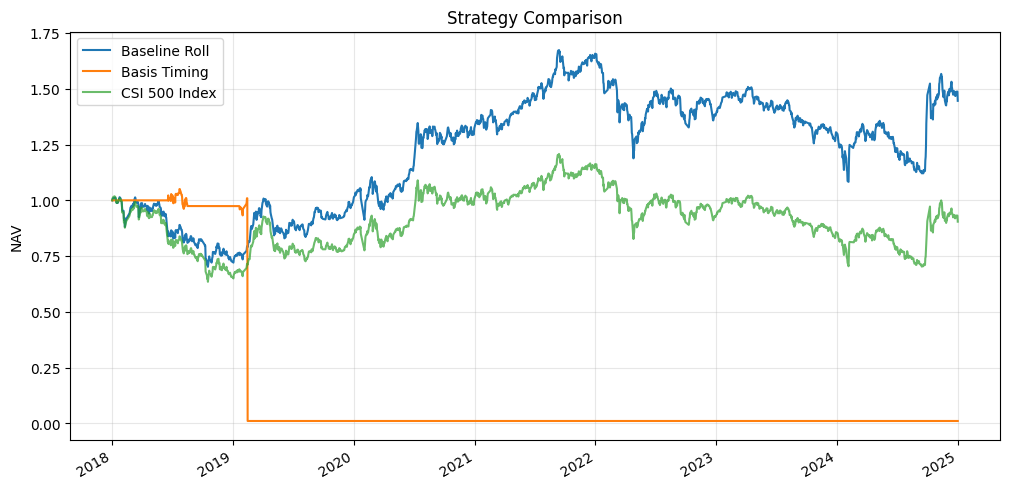

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

baseline_result.nav_series.plot(ax=ax, label='Baseline Roll', linewidth=1.5)
timing_result.nav_series.plot(ax=ax, label='Basis Timing', linewidth=1.5)
baseline_result.benchmark_nav.plot(ax=ax, label='CSI 500 Index', linewidth=1.5, alpha=0.7)

ax.set_title('Strategy Comparison')
ax.set_ylabel('NAV')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## 5. Compare Metrics

In [6]:
baseline_metrics = baseline_result.metrics
timing_metrics = timing_result.metrics

comparison = pd.DataFrame({
    'Metric': ['Ann. Return', 'Ann. Volatility', 'Sharpe', 'Max Drawdown', 'Alpha', 'Info Ratio'],
    'Baseline': [
        f"{baseline_metrics['annualized_return']:.2%}",
        f"{baseline_metrics['annualized_volatility']:.2%}",
        f"{baseline_metrics['sharpe_ratio']:.2f}",
        f"{baseline_metrics['max_drawdown']:.2%}",
        f"{baseline_metrics['alpha']:.2%}",
        f"{baseline_metrics['information_ratio']:.2f}",
    ],
    'Basis Timing': [
        f"{timing_metrics['annualized_return']:.2%}",
        f"{timing_metrics['annualized_volatility']:.2%}",
        f"{timing_metrics['sharpe_ratio']:.2f}",
        f"{timing_metrics['max_drawdown']:.2%}",
        f"{timing_metrics['alpha']:.2%}",
        f"{timing_metrics['information_ratio']:.2f}",
    ],
})

comparison

,Metric,Baseline,Basis Timing
0,Ann. Return,5.40%,-47.87%
1,Ann. Volatility,20.97%,37.62%
2,Sharpe,0.16,-1.33
3,Max Drawdown,-35.31%,-99.01%
4,Alpha,6.83%,-46.44%
5,Info Ratio,1.15,-1.08
